In [16]:
cat Dockerfile

# Pull model image
FROM ewatercycle/wflow:latest
MAINTAINER Gijs van den Oord <g.vandenoord@esciencecenter.nl>

# Install grpc4bmi
RUN pip install grpc4bmi

# Set environment
WORKDIR /data/input
ENV BMI_MODULE=wflow.wflow_bmi
ENV BMI_CLASS=wflowbmi_csdms
ENV BMI_PORT=55555
ENTRYPOINT ["run-bmi-server"]
EXPOSE 55555


In [17]:
import docker
client = docker.from_env()

In [18]:
client.images.list(name="wflow*")

[<Image: 'wflow-grpc4bmi:latest'>]

In [19]:
from grpc4bmi.bmi_client_docker import BmiClientDocker


In [20]:
wflow = BmiClientDocker(image="wflow-grpc4bmi:latest", image_port=55555, 
                        input_dir="./data/examples/wflow_rhine_sbm")

In [22]:
wflow.get_component_name()

'undefined'

In [23]:
wflow.initialize("wflow_sbm.ini")

In [24]:
wflow.get_input_var_names()

('CanopyStorage',
 'FirstZoneDepth',
 'LowerZoneStorage',
 'Snow',
 'SnowWater',
 'SurfaceRunoff',
 'SurfaceRunoffDyn',
 'TSoil',
 'UStoreDepth',
 'WaterLevel',
 'WaterLevelDyn',
 'InwaterMM',
 'IF')

In [25]:
wflow.get_output_var_names()

('CanopyStorage',
 'FirstZoneDepth',
 'LowerZoneStorage',
 'Snow',
 'SnowWater',
 'SurfaceRunoff',
 'SurfaceRunoffDyn',
 'TSoil',
 'UStoreDepth',
 'WaterLevel',
 'WaterLevelDyn',
 'PotTransSoil',
 'Transpiration',
 'ActEvapOpenWater',
 'soilevap',
 'Interception',
 'ActEvap',
 'SurfaceRunoffCatchmentMM',
 'ExcessWater',
 'InfiltExcess',
 'ActInfilt',
 'zi',
 'Transfer',
 'CapFlux',
 'RunoffCoeff',
 'InwaterMM')

In [26]:
tstart = wflow.get_start_time()
tstep = wflow.get_time_step()
print(tstart)

791510400.0


In [27]:
%time wflow.update_until(tstart + 100 * tstep)
print(wflow.get_current_time())

CPU times: user 240 µs, sys: 4.61 ms, total: 4.85 ms
Wall time: 18 s
800150400.0


In [28]:
variable = "SurfaceRunoff"
vals = wflow.get_value(variable)
unit = wflow.get_var_units(variable)

/home/stefanv/.local/share/virtualenvs/grpc4bmi-examples-zcVIRBXR/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


[]

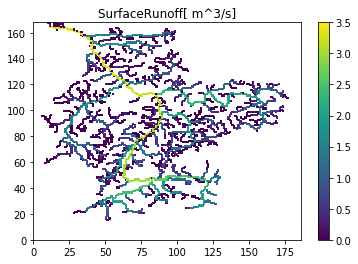

In [29]:
import matplotlib.pyplot as plt
import numpy
import numpy.ma as ma
missval = -999.
X, Y = numpy.arange(vals.shape[1]), numpy.arange(vals.shape[0])
Z = numpy.log10(ma.masked_where(vals < 0.1, vals))
plt.title(variable + '[' + unit + ']')
plt.pcolormesh(X,Y,Z)
plt.colorbar()
plt.clim(0, 3.5)
plt.plot()

In [30]:
del wflow

Output files and wflow log file have been written to resp.

In [31]:
ls -l data/examples/wflow_rhine_sbm/run_default data/examples/wflow_rhine_sbm/wflow_bmi.log


-rw-r--r-- 1 stefanv root    0 Jul 17 16:09 data/examples/wflow_rhine_sbm/wflow_bmi.log

data/examples/wflow_rhine_sbm/run_default:
total 264
drwxr-xr-x 2 stefanv root  4096 Jul 17 14:54 intbl/
-rw-r--r-- 1 stefanv root 29175 Jul 17 16:09 lev.tss
drwxr-xr-x 2 stefanv root 36864 Jul 17 14:54 outmaps/
drwxr-xr-x 2 stefanv root  4096 Jul 17 14:54 outstate/
drwxr-xr-x 2 stefanv root  4096 Jul 17 14:54 outsum/
-rw-r--r-- 1 stefanv root 17817 Jul 17 16:09 prec.csv
drwxr-xr-x 2 stefanv root  4096 Jul 17 14:54 runinfo/
-rw-r--r-- 1 stefanv root 27948 Jul 17 16:09 run.tss
-rw-r--r-- 1 stefanv root 26910 Jul 17 16:09 specrun.csv
-rw-r--r-- 1 stefanv root 27288 Jul 17 16:09 store.csv
-rw-r--r-- 1 stefanv root 27708 Jul 17 16:09 teact.csv
-rw-r--r-- 1 stefanv root 10554 Jul 17 16:09 tra_lu.csv
-rw-r--r-- 1 stefanv root 29931 Jul 17 16:09 wflow.log
